# Stacked barchart

* A clean stacked barplot with nice color palette, some very clean inline labels, a powerful title and slick footer caption with logos.

## Libraries

For this tutorial, you'll need to install the following librairies:

- [matplotlib](https://python-graph-gallery.com/matplotlib/) is the main library used for both graphics and customization.
- `pandas` will be used to open and manipulate our dataset
- `numpy` and `scipy` for **smoothing the graph**

In case you never used it, remember to install scipy with `pip install scipy`

In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd

## Load the dataset


If you want to **reproduce** the results, you can find and download the [dataset used on github](https://github.com/holtzy/R-graph-gallery/blob/master/DATA/wealth_data.xlsx). Then, you can use the `read_excel()` function from **pandas** to read the file since it's in a *xlsx* format.

**Remember to update** the `my_path` variable to where you put the file on your computer.

In [2]:
# !pip install openpyxl

## Read the Excel file into a DataFrame
my_path = "https://github.com/nnthanh101/Machine-Learning/raw/main/analytics/data"
df = pd.read_excel(f"{my_path}/wealth_data.xlsx")

## Basic stacked area plot

Everything start with a basic **stacked area chart**. You can see many examples in the [stacked area chart section](https://python-graph-gallery.com/stacked-area-plot/) of the Python graph gallery, including beginner level tutorials. 

The `pivot()` function will take the original dataframe and transform it into a new table with years as rows, countries as columns, and the `total_wealth` values at the intersections of years and countries. 

Then we use the `stackplot` function from [matplotlib](https://python-graph-gallery.com/matplotlib/) to indicate that we want to create a stacked area chart, with years for the x axis, amounts for the y axis and separated by country (and *therefore* by column).

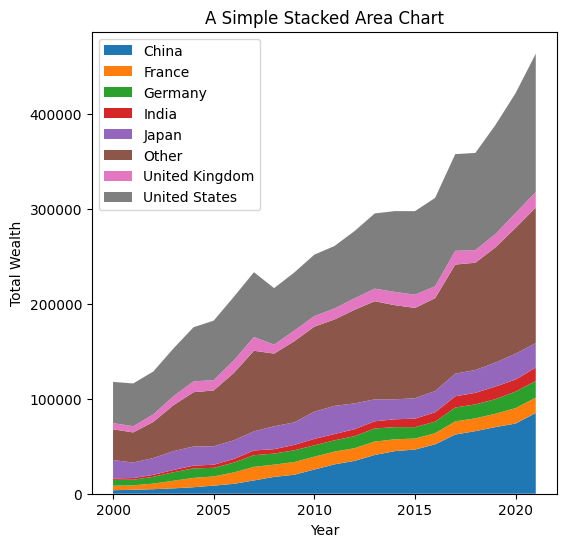

In [3]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='year', columns='country', values='total_wealth')

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(6, 6))  # Set the figure size
plt.stackplot(pivot_df.index,
              pivot_df.values.T,
              labels=pivot_df.columns)
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Total Wealth') # Add a label for the y-axis
plt.title('A Simple Stacked Area Chart') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

## Changing the colors and Smoothing the lines

### Modifying the colors

In the latter chart, the colors are not very beautiful. You might want to change them to **your own colors**. In order to do this, you have to define a list of colors of the **same length as the number of labels** (here it's the number of countries). Then, you just have to put `colors=custom_colors` when calling the `stackplot` function.
 
### Smoothing

Smoothed data allows us to better reflect the trend and evolution of data. To smooth the data, we use **spline interpolation** from `scipy`. It creates a new set of evenly spaced x values (`x_smooth`) that span the range of years from the minimum to the maximum year in the data. 

It then applies spline interpolation **to smooth the total wealth data for each country** over these new x values. The result is stored in a new dataframe `pivot_smooth`.

In [4]:
# Libraries
import numpy as np
from scipy.interpolate import make_interp_spline

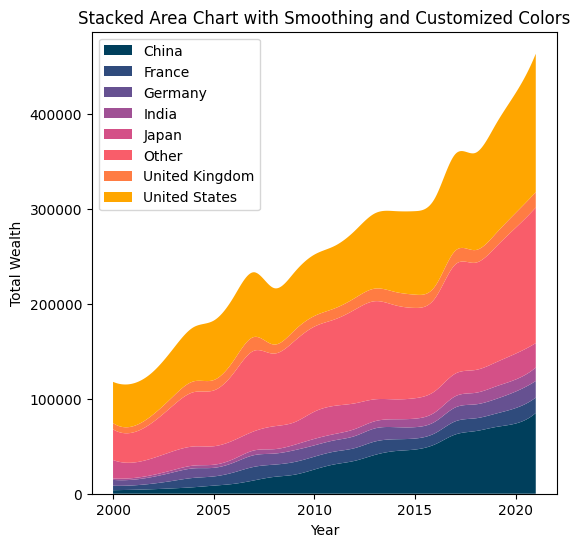

In [5]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='year', columns='country', values='total_wealth')

# Define custom colors for the countries
custom_colors = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]

# Smooth the lines using spline interpolation
x_smooth = np.linspace(pivot_df.index.min(), pivot_df.index.max(), 300)
pivot_smooth = pd.DataFrame({country: make_interp_spline(pivot_df.index, pivot_df[country])(x_smooth)
                             for country in pivot_df.columns})

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(6, 6))  # Set the figure size
plt.stackplot(x_smooth,
              pivot_smooth.values.T,
              labels=pivot_smooth.columns,
              colors=custom_colors)
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Total Wealth') # Add a label for the y-axis
plt.title('Stacked Area Chart with Smoothing and Customized Colors') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

## Stacking order

Now that you know how to make a stacked area chart with your own colors, let's see how to **specify the order of the labels on the chart**. It's actually quite simple: you create a list with the order of the labels and **adjust your pivot_df** in the same order. 

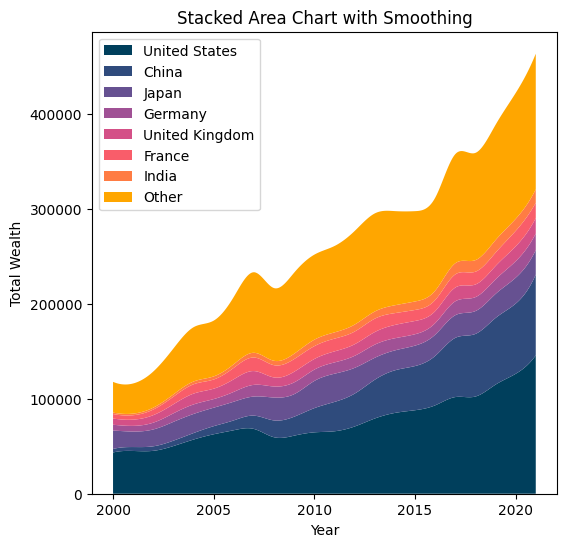

In [6]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='year', columns='country', values='total_wealth')

# Define custom colors for the countries
custom_colors = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]

# Define the desired order of countries
desired_order = ["United States", "China", "Japan", "Germany", "United Kingdom", "France", "India", "Other"]

# Reorder the columns of the pivot_df and custom_colors list
pivot_df = pivot_df[desired_order]

# Smooth the lines using spline interpolation
x_smooth = np.linspace(pivot_df.index.min(), pivot_df.index.max(), 300)
pivot_smooth = pd.DataFrame({country: make_interp_spline(pivot_df.index, pivot_df[country])(x_smooth)
                             for country in pivot_df.columns})

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(6, 6))  # Set the figure size
plt.stackplot(x_smooth, pivot_smooth.values.T, labels=pivot_smooth.columns, colors=custom_colors)
plt.xlabel('Year')
plt.ylabel('Total Wealth')
plt.title('Stacked Area Chart with Smoothing')
plt.legend(loc='upper left')
plt.show()

## Add anotation

This step can take some time, as many of the texts and annotations are added manually. We're mainly using `plt.text()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/), which makes it **super-easy to add text** to a graph.

In order to display the Github and Twitter logos at the bottom of the graph, we need to use another library: `PIL` for opening the image. The latter must be **locally stored** on the computer: don't forget to **download them** (any found on the internet will do).

Also, in order to add lines and points, we need to import the `cm` module from matplotlib.

In [7]:
# Libraries 
from PIL import Image # Open the image
import matplotlib.cm as cm # Add annotations (lines and points)

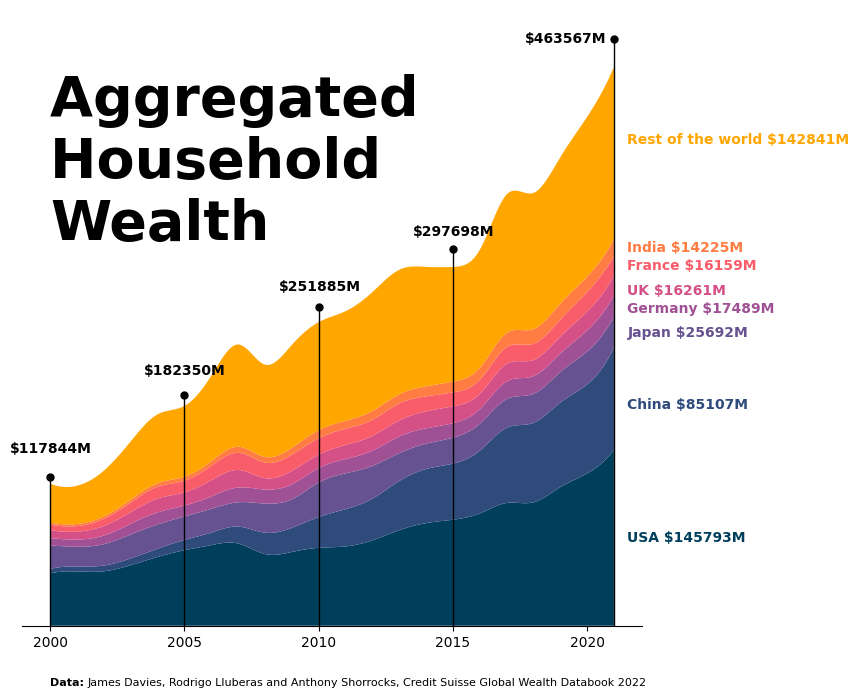

In [8]:
# Create a pivot table to reshape the data for stacked area chart
pivot_df = df.pivot(index='year', columns='country', values='total_wealth')

# Define custom colors for the countries
custom_colors = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600"]

# Define the desired order of countries
desired_order = ["United States", "China", "Japan", "Germany", "United Kingdom", "France", "India", "Other"]

# Reorder the columns of the pivot_df and custom_colors list
pivot_df = pivot_df[desired_order]

# Smooth the lines using spline interpolation
x_smooth = np.linspace(pivot_df.index.min(), pivot_df.index.max(), 300)
pivot_smooth = pd.DataFrame({country: make_interp_spline(pivot_df.index, pivot_df[country])(x_smooth)
                             for country in pivot_df.columns})

# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(8, 8))  # Set the figure size
plt.stackplot(x_smooth, pivot_smooth.values.T, labels=pivot_smooth.columns, colors=custom_colors)

# `plt.gca()` function is used to obtain a reference to the current axes on which you plot your data
ax = plt.gca()

# Annotations for the values per year
def add_annotations_year(year):
    """
    Input: a year
    Apply: add to the graph the total wealth of all countries at a given date
           and a line from the bottom of the graph to the total value of wealth
    """
    
    # Calculate total amount of wealth at a given year
    y_end = df[df["year"]==year]["total_wealth"].sum()
    
    # Set values in areas where the graph does not appear
    # Special case for 2021: we put it on the left instead of upper the line
    if year==2021:
        modif_xaxis = -3.3
        modif_yaxis = 20000
    else:
        modif_xaxis = -1.5
        modif_yaxis = 26000
    
    # Add the values, with a specific position, in bold, black and a fontsize of 10
    plt.text(year+modif_xaxis,
             y_end+modif_yaxis,
             f'${y_end}M',
             fontsize=10,
             color='black',
             fontweight = 'bold')
    
    # Add line 
    ax.plot([year, year], # x-axis position
            [0, y_end*1.05], # y-axis position (*1.05 is used to make a it little bit longer)
            color='black', # Color
            linewidth=1) # Width of the line
    
    # Add a point at the top of the line
    ax.plot(year, # x-axis position
            y_end*1.05, # y-axis position (*1.05 is used to make a it little bit longer)
            marker='o', # Style of the point
            markersize=5, # Size of the point
            color='black') # Color

# Add the line and the values for each of the following years
for year in [2000,2005,2010,2015,2021]:
    add_annotations_year(year)
    
# Annotations for the values per country
def add_annotations_country(country, value_placement, amount, color):
    """
    Adds an annotation to a plot at a specific location with information about a country's amount in millions.

    Parameters:
        country (str): The name of the country for which the annotation is being added.
        value_placement (float): The vertical position where the annotation will be placed on the plot.
        amount (float): The amount in millions that will be displayed in the annotation.
        color (str): The color of the annotation text.
    """
    plt.text(2021.5, value_placement, f'{country} ${amount}M', fontsize=10, color=color, fontweight='bold')

# We manually define the labels, values and position that will be displayed on the right of the graph
countries = ['Rest of the world', 'India', 'France', 'UK', 'Germany', 'Japan', 'China', 'USA']
values_placement = [400000, 310000, 295000, 275000, 260000, 240000, 180000, 70000]
amounts = [142841, 14225, 16159, 16261, 17489, 25692, 85107, 145793]
custom_colors.reverse() # Makes sure the colors match the country concerned

# Iterate over all countries and add the name with the right value and color
for country, value, amount, color in zip(countries, values_placement, amounts, custom_colors):
    add_annotations_country(country, value, amount, color)

# Title of our graph 
plt.text(2000, 320000,
         'Aggregated \nHousehold \nWealth', # Title ('\n' allows you to go to the line)
         fontsize=40, # High font size for style
         color='black',
         fontweight = 'bold')

# Credits and data information
plt.text(2000, -50000, 'Data:', fontsize=8, color='black', fontweight = 'bold')
plt.text(2001.4, -50000, 'James Davies, Rodrigo Lluberas and Anthony Shorrocks, Credit Suisse Global Wealth Databook 2022', fontsize=8, color='black')
# plt.text(2000, -63000, 'Design:', fontsize=8, color='black', fontweight = 'bold')
# plt.text(2001.9, -63000, 'Emily', fontsize=8, color='black')

# Images
def add_logo(path_to_logo, text, image_bottom_left_x, image_bottom_left_y, image_width):
    """
    Adds a logo image and text to a plot at specific positions.

    Parameters:
        path_to_logo (str): The file path to the logo image that will be added to the plot.
        text (str): The text to be added along with the logo.
        image_bottom_left_x (float): The x-coordinate of the bottom-left corner of the logo image's position on the plot.
        image_bottom_left_y (float): The y-coordinate of the bottom-left corner of the logo image's position on the plot.
        image_width (float): The width of the logo image in the plot.
    """
    logo = Image.open(path_to_logo) # Open the image
    image_array = np.array(logo) # Convert to a numpy array
    image_height = image_width * image_array.shape[0] / image_array.shape[1]  # Calculate height based on ratio

    # Add image to graph 
    ax_image = plt.axes([image_bottom_left_x, # Position on the x-axis
                         image_bottom_left_y, # Position on the y-axis
                         image_width, # Image width
                         image_height]) # Image height
    ax_image.imshow(image_array) # Display the image
    ax_image.axis('off') # Remove axis of the image in order to improve style
    
    # Add text
    plt.text(700, # Position on the x-axis
             image_bottom_left_y+500, # Position on the y-axis
             text,
             fontsize=8,
             color='black')

# # Add github and twitter credentials
# add_logo("images/github.png", "nnthanh101", 0.155, -0.03, 0.03)
# add_logo("images/twitter.png", "nnthanh101", 0.16, -0.06, 0.02)

# Remove the y-axis frame (left, right and top spines)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove the ticks and labels on the y-axis
ax.tick_params(left=False, labelleft=False)

# Display the chart
plt.show()

## References

This page showcases the work of [Gilbert Fontana](https://twitter.com/GilbertFontana?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor), which was originally published on [twitter](https://twitter.com/GilbertFontana/status/1681734005668888601). The chart was originally made with [R](https://r-graph-gallery.com/web-stacked-area-chart-inline-labels.html). This post is a translation to Python by [Joseph B](https://www.linkedin.com/in/joseph-barbier-4ab531224/).